IA & Data science (LU3IN0226) -- 2020-2021
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Edoardo Sarti, Olivier Schwander.*

## Projet 2021

*Binome : Rayane Azoui, Florian Zinopoulos *

# Note book 2: Apprentissage non supervisé

Le DataSet utilisé est accessible à l'adresse : https://www.kaggle.com/lava18/google-play-store-apps.

## Partie 1 - Description du problème

Dans ce note book nous allons vous montrer notre étude sur l'apprentissage non supervisé grâce au dataset *GoogleApps-store-apps*, la problématique qu'on va traiter dans ce note book est de trouver la catégorie et le content Rating d'une bonne application afin de guider un client dans son choix, tel que cette application doit appartenir a une catégorie qui respecte les conditions suivante qui sont :

        Le nombre d'installation doit être grand.
        
        Rating > 4 

## Partie 2 - Modèle:


Pour faire l'apprentissage non supervisé, on va utiliser l'algorithme des k-moyennes, car ça va nous permettre de visualiser les différents clusters de notre DataSet et mettre des remarques utiles pour résoudre notre problématique, mais avant, on doit numériser notre DataSet donc utilisé du one hot encoding, puis pour visualiser les données, on va les convertir de n dimension en 2 et à la fin, on va montrer les caractéristiques de chaque cluster tel que pour chacun, on va montrer :  

        Le Rating.
        La Catégorie majorante.
        Content Rating
        La moyennes et la variance du nombre d'instalation pour chaque cluster. 

## Partie 3 - Code

Pour faire l'apprentissage non supervisé, on va utiliser l'algorithme des k-moyennes, car ça va nous permettre de visualiser les différents clusters de notre DataSet et mettre des remarques utiles pour résoudre notre problématique, mais avant, on doit numériser notre DataSet donc utilisé du one hot encoding, puis pour visualiser les données, on va les convertir de n dimension en 2 et à la fin, on va montrer les caractéristiques de chaque cluster tel pour chacun, on va montrer :  

Avant de commencer on fait un import des bibliothèques qu'on va utiliser au cours de ce Notebook.

In [2]:
from sklearn.preprocessing import StandardScaler    # utiliser pour converitire une base de donnée de n dimmension en 2 dimmension 
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import random
sys.path.append('./')

import kmoy_algorithm as ka      # l'algorithme des k moyenne 
import copy

In [3]:
gp_store = pd.read_csv("GoogleApps/googleplaystore.csv")

## 3.1-Filtrage du DataSet

Dans cette étude la colonne Android Ver, Last Update, Current Ver, App ne nous intéresse pas car ce ne sont pas des données qu'on peut manipuler dans l'algorithme des k-moyennes et génere beaucoup de calculs et d'informations dont on n'a pas besoin.

La colonne Genre et Catégorie sont des colonnes assez communes donc on peut enlever la colonne Genre.

In [4]:
gp_store.drop("Android Ver",inplace=True,axis=1)
gp_store.drop('Last Updated',inplace=True,axis=1)
gp_store.drop("Current Ver",inplace=True,axis=1)
gp_store.drop('Genres',inplace=True,axis=1)

In [5]:
gp_store = gp_store.dropna()
gp_store = gp_store.drop_duplicates()
# Conversion des valeurs de la colonne Reviews en entiers

gp_store["Reviews"] = gp_store["Reviews"].astype(int)





gp_store.head(20)

App        Category  Rating  \
0      Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                 Coloring book moana  ART_AND_DESIGN     3.9   
2   U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                               Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4               Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                          Paper flowers instructions  ART_AND_DESIGN     4.4   
6             Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                    Infinite Painter  ART_AND_DESIGN     4.1   
8                                Garden Coloring Book  ART_AND_DESIGN     4.4   
9                       Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   
10                            Text on Photo - Fonteee  ART_AND_DESIGN     4.4   
11            Name Art Photo Editor - Focus n Filters  ART_AND_DESIGN     4.4   
12                     Tattoo Name On My Photo Editor  ART_AND_DESIGN     4.2   
13                              Mandala Coloring Book  ART_AND_DESIGN     4.6   
14    3D Color Pixel by Number - Sandbox Art Coloring  ART_AND_DESIGN     4.4   
15                    Learn To Draw Kawaii Characters  ART_AND_DESIGN     3.2   
16       Photo Designer - Write your name with shapes  ART_AND_DESIGN     4.7   
17                           350 Diy Room Decor Ideas  ART_AND_DESIGN     4.5   
18                      FlipaClip - Cartoon animation  ART_AND_DESIGN     4.3   
19                                       ibis Paint X  ART_AND_DESIGN     4.6   

    Reviews  Size     Installs  Type Price Content Rating  
0       159   19M      10,000+  Free     0       Everyone  
1       967   14M     500,000+  Free     0       Everyone  
2     87510  8.7M   5,000,000+  Free     0       Everyone  
3    215644   25M  50,000,000+  Free     0           Teen  
4       967  2.8M     100,000+  Free     0       Everyone  
5       167  5.6M      50,000+  Free     0       Everyone  
6       178   19M      50,000+  Free     0       Everyone  
7     36815   29M   1,000,000+  Free     0       Everyone  
8     13791   33M   1,000,000+  Free     0       Everyone  
9       121  3.1M      10,000+  Free     0       Everyone  
10    13880   28M   1,000,000+  Free     0       Everyone  
11     8788   12M   1,000,000+  Free     0       Everyone  
12    44829   20M  10,000,000+  Free     0           Teen  
13     4326   21M     100,000+  Free     0       Everyone  
14     1518   37M     100,000+  Free     0       Everyone  
15       55  2.7M       5,000+  Free     0       Everyone  
16     3632  5.5M     500,000+  Free     0       Everyone  
17       27   17M      10,000+  Free     0       Everyone  
18   194216   39M   5,000,000+  Free     0       Everyone  
19   224399   31M  10,000,000+  Free     0       Everyone

Ici on supprime les exemples qui contiennent des valeurs nulles ou dupliquées et on catégorise les colonnes Installs, Size, Reviews, Price comme Florian l'a fait dans le premier Notebook qui est aussi adapté ici dans le cas de cette étude (on a essayé de garder les mêmes valeurs mais cela a généré beaucoup d'informations ce qui nous a empêché de faire la différence entre les différents clusters). 

In [6]:
gp_store.dropna(inplace=True)      # supprimer les exemple avec des valeurs null ou non defénie
gp_store.drop_duplicates(inplace=True)    # supprimer les valeurs repeter


index = gp_store.index.tolist()

# Transformation de la colonne Size

for i in index:
    if (gp_store.loc[i, "Size"] == "Varies with device"):
        gp_store.loc[i, "Size"] = "0"
    elif ("k" in gp_store.loc[i, "Size"]):
        gp_store.loc[i, "Size"] = "1"
    else:
        val = gp_store.loc[i, "Size"]
        val = re.search("[0-9]+[.]*[0-9]*", val)
        val = float(val.string.split("M")[0])
        if (val < 1.):
            gp_store.loc[i, "Size"] = 1
        elif (val >= 1 and val < 10):
            gp_store.loc[i, "Size"] = 10
        elif (val >= 10 and val < 50):
            gp_store.loc[i, "Size"] = 50
        elif (val >= 50 and val <= 100):
            gp_store.loc[i, "Size"] = 100
        gp_store.loc[i, "Size"] = str(val)

gp_store["Size"] = gp_store["Size"].astype(float)


# On regroupe les valeurs de Reviews en 5 catégories

l1 = gp_store.index[gp_store['Reviews'] < 1000].tolist()
l2 = gp_store.index[(gp_store['Reviews'] < 10000) & (gp_store['Reviews'] >= 1000)].tolist()
l3 = gp_store.index[(gp_store['Reviews'] < 100000) & (gp_store['Reviews'] >= 10000)].tolist()
l4 = gp_store.index[(gp_store['Reviews'] < 1000000) & (gp_store['Reviews'] >= 100000)].tolist()
l5 = gp_store.index[gp_store['Reviews'] >= 1000000].tolist()

for i in l1:
    gp_store.loc[i, 'Reviews'] = 500
for i in l2:
    gp_store.loc[i, 'Reviews'] = 5000
for i in l3:
    gp_store.loc[i, 'Reviews'] = 50000
for i in l4:
    gp_store.loc[i, 'Reviews'] = 500000
for i in l5:
    gp_store.loc[i, 'Reviews'] = 1000000

# On regroupe les valeurs de Installs en 7 catégories

for i in index:
    val = gp_store.loc[i, 'Installs']
    val = re.search("[0-9]+[,]*[0-9]*[,]*[1-9]*[,]*[1-9]*", val)
    val = float(val.string.split("+")[0].replace(",", ""))
    gp_store.loc[i, 'Installs']=val
  


# On regroupe les valeurs de Price en 6 catégories

for i in index:
    val = gp_store.loc[i, 'Price']
    if (val == '0'):
        continue
    val = re.search("[$]{1}[0-9]+[.]*[0-9]*", val)
    val = float(val.string.split("$")[1])
    if (val > 0 and val < 5):
        gp_store.loc[i, 'Price'] = 1
    elif (val >= 5 and val < 10):
        gp_store.loc[i, 'Price'] = 5
    elif (val >= 10 and val < 50):
        gp_store.loc[i, 'Price'] = 10
    elif (val >= 50 and val < 100):
        gp_store.loc[i, 'Price'] = 50
    else:
        gp_store.loc[i, 'Price'] =100

for i in ['Reviews', 'Size', 'Installs', 'Price']:
    gp_store[i]=gp_store[i].astype(float)

#gp_store["Rating"]=gp_store["Rating"].astype(int)
gp_store_copy=copy.deepcopy(gp_store)
print(gp_store.head(15))

                                                  App        Category  Rating  \
0      Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                 Coloring book moana  ART_AND_DESIGN     3.9   
2   U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                               Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4               Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                          Paper flowers instructions  ART_AND_DESIGN     4.4   
6             Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                    Infinite Painter  ART_AND_DESIGN     4.1   
8                                Garden Coloring Book  ART_AND_DESIGN     4.4   
9                       Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   
10                            Text on Photo - Fonteee  ART_AND_DESIGN     4.4   
11            Name Art Photo

## 3.2-One Hot encoding des colonnes d'attribut catégoriel

Les colonnes de type catégoriel sont : \[Genres,Category,Content Rating]

In [7]:
gp_store_copy1=copy.deepcopy(gp_store)
#on va eclater la colonne Categorie 

cat=len(gp_store["Category"])

for i in np.unique(gp_store["Category"]):
    data=np.where(gp_store["Category"]==i,np.ones(cat,dtype=int),np.zeros(cat,dtype=int))
    gp_store[i]=data

#puis on l'enleve

gp_store.drop('Category',inplace=True,axis=1)

#######################################################

#Content rating aussi 

for i in np.unique(gp_store["Content Rating"]):
    data=np.where(gp_store["Content Rating"]==i,np.ones(cat,dtype=int),np.zeros(cat,dtype=int))
    gp_store[i]=data

gp_store.drop('Content Rating',inplace=True,axis=1)

#######################################################

for i in np.unique(gp_store["Type"]):
    data=np.where(gp_store["Type"]==i,np.ones(cat,dtype=int),np.zeros(cat,dtype=int))
    gp_store[i]=data

gp_store.drop('Type',inplace=True,axis=1)

names=gp_store["App"]
gp_store.drop("App",inplace=True,axis=1)
gp_store.head()

Rating   Reviews  Size    Installs  Price  ART_AND_DESIGN  \
0     4.1     500.0  19.0     10000.0    0.0               1   
1     3.9     500.0  14.0    500000.0    0.0               1   
2     4.7   50000.0   8.7   5000000.0    0.0               1   
3     4.5  500000.0  25.0  50000000.0    0.0               1   
4     4.3     500.0   2.8    100000.0    0.0               1   

   AUTO_AND_VEHICLES  BEAUTY  BOOKS_AND_REFERENCE  BUSINESS  ...  \
0                  0       0                    0         0  ...   
1                  0       0                    0         0  ...   
2                  0       0                    0         0  ...   
3                  0       0                    0         0  ...   
4                  0       0                    0         0  ...   

   VIDEO_PLAYERS  WEATHER  Adults only 18+  Everyone  Everyone 10+  \
0              0        0                0         1             0   
1              0        0                0         1             0   
2              0        0                0         1             0   
3              0        0                0         0             0   
4              0        0                0         1             0   

   Mature 17+  Teen  Unrated  Free  Paid  
0           0     0        0     1     0  
1           0     0        0     1     0  
2           0     0        0     1     0  
3           0     1        0     1     0  
4           0     0        0     1     0  

[5 rows x 46 columns]

## Partie 4 - Protocole expérimental

On va d'abord visualiser nos données puis choisir le nombre de centre k-moyenne qui nous permettra d'avoire une bonne partition de données dans chaque cluster tel que chaque cluster contient des exemple qui se resemble .

## 4.1-N dimension a 2 dimension 

-Transformer notre dataset de n dimension à 2 dimensions est une opération qui fait perdre de l'information, mais pour faire des graphes et mettre des remarques sur nos données c'est un excellent moyen; donc ici on va projeter nos données en deux dimensions et les utiliser dans notre algorithme des k-moyennes. 


        -méthode 1 : en utilisant les outils que la bibliothèque Sklearn nous procure (StandardScaler,PCA) (c'est la représentation que j'utilise car elle est plus claire).
        -méthode 2 : la méthode qu'on a utilisée dans le cours 5 de cette UE pour cette année.

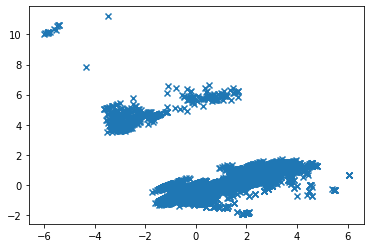

In [8]:
'''  M 1 '''

 
gpn=gp_store.to_numpy()      # data frame to numpy array 
x = gp_store.loc[:,:].values
x = StandardScaler().fit_transform(x)               # normaliser nos données 
pca = PCA(n_components=2)          
principalComponents = pca.fit_transform(x)     # de n dimension a 2 dim 

plt.scatter(principalComponents[:,0],principalComponents[:,1],marker='x')
plt.show()

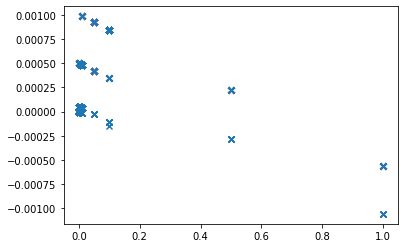

In [9]:
''' M 2 '''

X2=ka.normalisation(gp_store.to_numpy())


covariance_matrix = np.cov(X2.T)    # calculer la transposer 
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)   # calculer les valeurs propres et le vecteur propre 
variance_explained = []

for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)

cumulative_variance_explained = np.cumsum(variance_explained)
projection_matrix = (eigen_vectors.T[:][:2]).T 
X_pca = X2.dot(projection_matrix)   # resultat

plt.figure()
plt.scatter(X_pca[:,0],X_pca[:,1],marker='x')
plt.show()

## 4.2-Algorithme des k moyennes 


Maintenant nous allons utiliser l'algorithme des k-moyennes sur les données que nous venons d'extraire.

*k=3*

inersie : 5968.397318834843


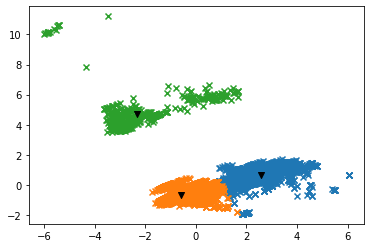

In [10]:
les_centres, l_affectation = ka.kmoyennes(3,principalComponents,0.05, 100)
ka.affiche_resultat2(principalComponents,les_centres, l_affectation)
plt.show()

*k=4*

inersie : 4995.758432178809


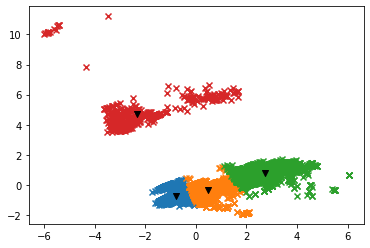

In [11]:
les_centres, l_affectation = ka.kmoyennes(4,principalComponents,0.05, 100)
ka.affiche_resultat2(principalComponents,les_centres, l_affectation)
plt.show()

*k=5*

inersie : 4439.904436661627


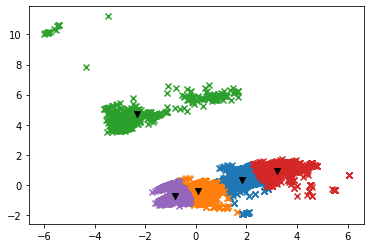

In [12]:
les_centres, l_affectation = ka.kmoyennes(5,principalComponents,0.05, 100)
ka.affiche_resultat2(principalComponents,les_centres, l_affectation)
plt.show()

## 4.3-K?

D'après le graphe qu'on a eu dans la 2ème méthode (M2) de la représentation des points, on remarque qu'il y a au moins 3 clusters donc pour notre cas d'étude j'ai pris k=5.

## Partie 5 - Résultats


## 5.2-Affichage des graphes d'information de chaque Cluster pour k=5


In [13]:
random.seed(42)
les_centres, l_affectation = ka.kmoyennes(5,principalComponents,0.05, 100)
print(les_centres)

inersie : 4439.904436661627
[[ 3.20807874  0.93255638]
 [-0.83037941 -0.75526729]
 [ 1.80827867  0.34737389]
 [ 0.10013274 -0.42060585]
 [-2.33639197  4.68570523]]


## Graphique

cluster n° 0


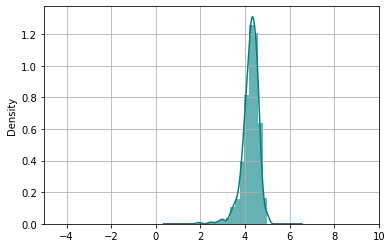

cluster n° 1


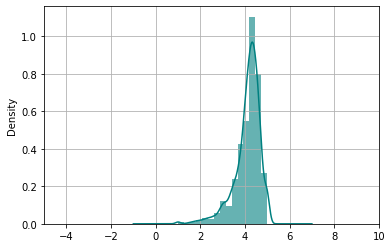

cluster n° 2


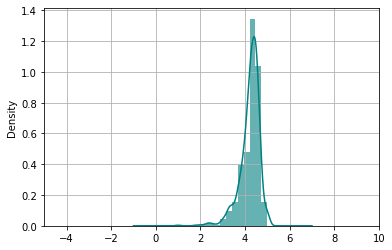

cluster n° 3


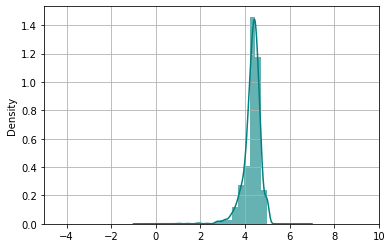

cluster n° 4


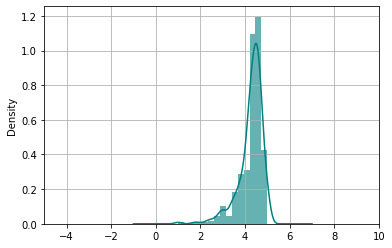

In [14]:
for i in range(len(l_affectation)):
    print("cluster n°",str(i))
    n=names.iloc[l_affectation[i]]
    df=gp_store_copy[gp_store_copy["App"].isin(n.to_numpy().tolist())]
    xt=df['Rating'].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
    df["Rating"].plot(kind='density', color='teal')

    plt.grid()
    plt.xlim(-5,10)
    plt.show()
   

cluster n° 0


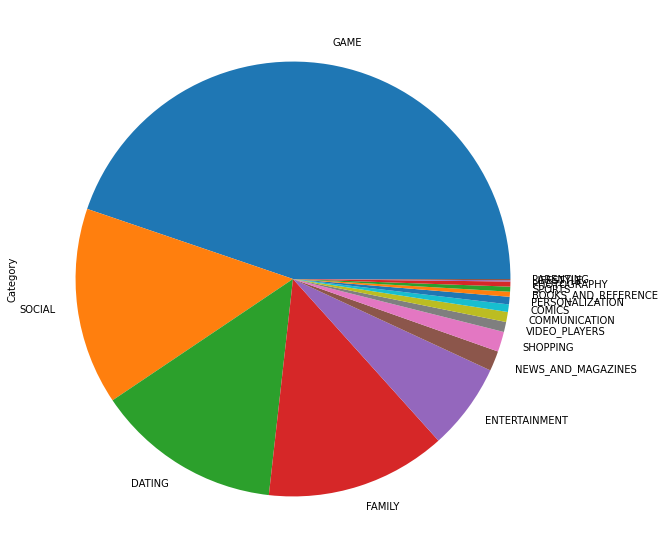

cluster n° 1


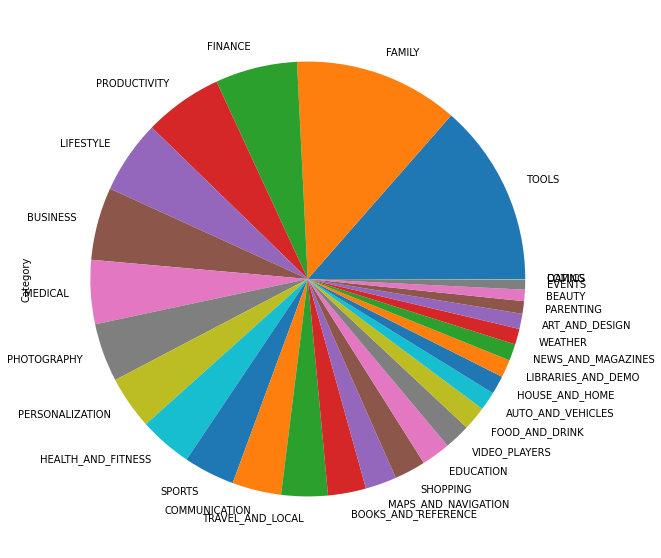

cluster n° 2


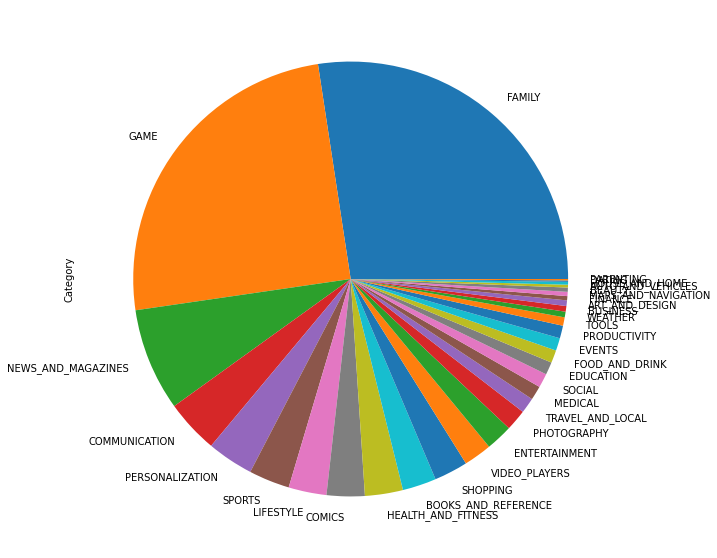

cluster n° 3


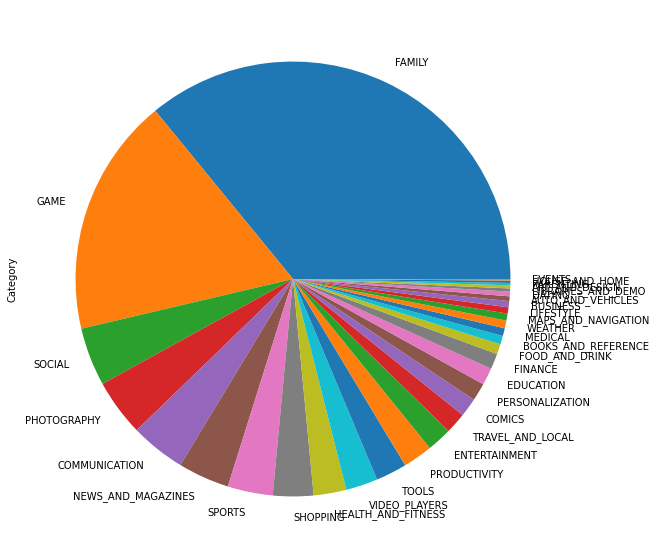

cluster n° 4


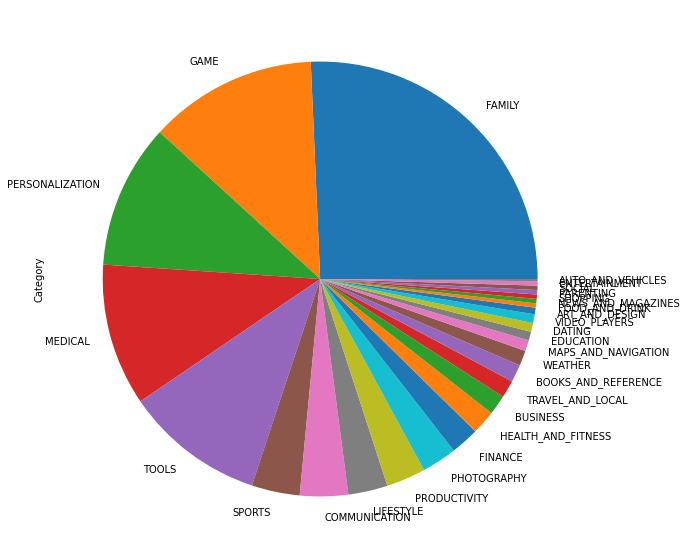

In [15]:
for i in range(len(l_affectation)):
    print("cluster n°",str(i))
    n=names.iloc[l_affectation[i]]
    df=gp_store_copy[gp_store_copy["App"].isin(n.to_numpy().tolist())]

    plt.figure(figsize=(10,10))
    df['Category'].value_counts().plot(kind='pie')
    plt.show()

## les catégories majoritaires pour chaque Cluster :

        -Cluster 0 : Family, Game
        -Cluster 1 : Family, Tools, Others
        -Cluster 2 : game, Familly
        -Cluster 3 : Family,Game
        -Cluster 4 : Game, Social,Dating

cluster n° 0


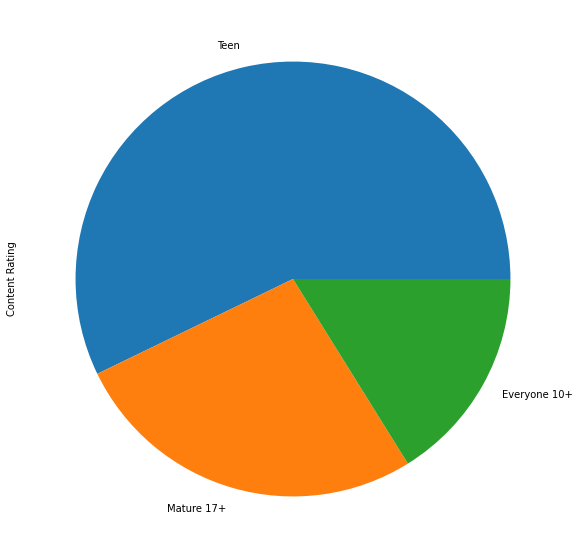

cluster n° 1


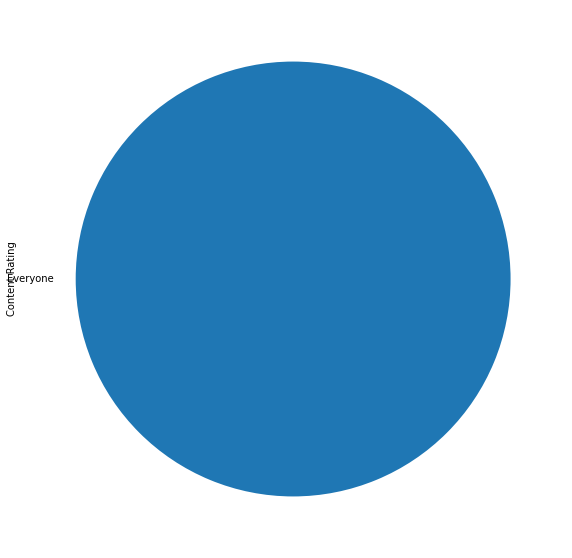

cluster n° 2


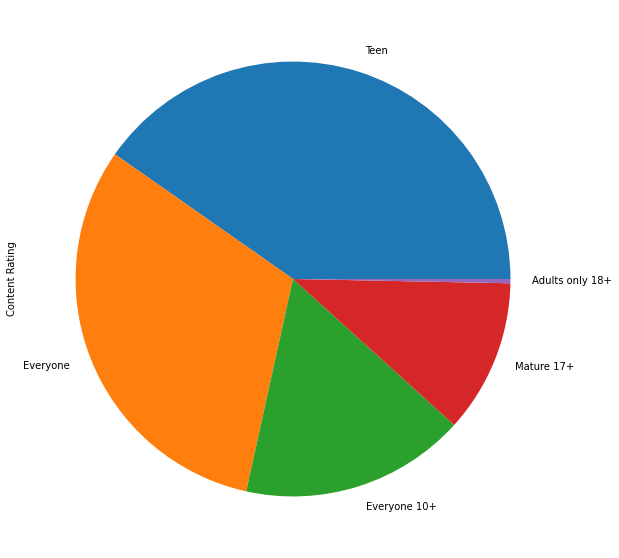

cluster n° 3


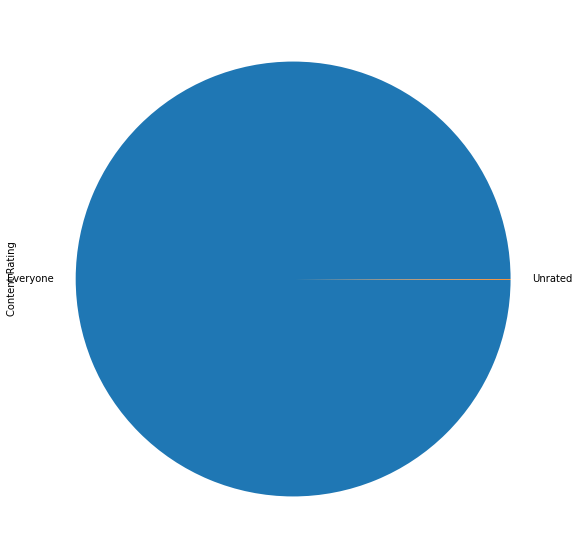

cluster n° 4


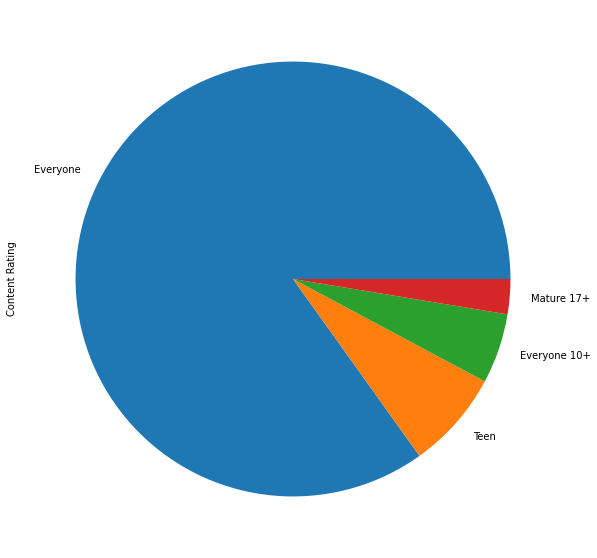

In [16]:
for i in range(len(l_affectation)):
    print("cluster n°",str(i))
    n=names.iloc[l_affectation[i]]
    df=gp_store_copy[gp_store_copy["App"].isin(n.to_numpy().tolist())]

    plt.figure(figsize=(10,10))
    df['Content Rating'].value_counts().plot(kind='pie')
    plt.show()

## Content Rating
        -Cluster 0 : Everyone
        -Cluster 1 : Everyone
        -Cluster 2 : teen,Everyone
        -Cluster 3 : Everyone
        -Cluster 4 : teen,Mature+17

## Moyenne et Variance 

In [17]:
for i in range(len(l_affectation)):
    print("cluster n°",str(i))
    n=names.iloc[l_affectation[i]]
    df=gp_store_copy[gp_store_copy["App"].isin(n.to_numpy().tolist())]
    print("moy : ",str(df["Installs"].mean()))
    print("var : ",str(df["Installs"].var()))

cluster n° 0
moy :  41089502.87313433
var :  2.18726115899856e+16
cluster n° 1
moy :  2644910.198871038
var :  92207852571779.53
cluster n° 2
moy :  53329701.97698745
var :  3.0862953436508576e+16
cluster n° 3
moy :  24945483.753614806
var :  6206998202012494.0
cluster n° 4
moy :  275304.8487804878
var :  16740005731992.092


## les clusters les plus installés :
    -Cluster 2 : moy: 53380308 ,var: trés Haut
    -Cluster 4 : moy: 41123153 ,var: trés Haut 
    -Cluster 1 : moy: 2633976 ,var: 92312429900748
    -Cluster 4 : moy: 275304 ,var: 16740005731992
    -Cluster 3 : moy: 24863236,var: 6179958129207646



## Remarque : 

1-D'après nos résultats, on peut remarquer que niveau installation, le cluster numéro 2 n'a pas de concurrence, car il a la moyenne la plus haute, d'autre part, on remarque aussi que la densité qu'on a eu dans le Rating et très haute aussi dans ce cluster (1.4 dans le Rating 4), mais la variance est trop haute aussi donc y'a des risques que l'application échoue .

2-On peut aussi distinguer les 3 clusters (3/5 cluster ont le même résultat) ce qui affirme l'hypothèse qu'on a faite dans la M2.

## 6-Analyse

## Conclusion

D'après nos résultats, le cluster numéro 2 respecte nos conditions donc si un client nous demande des informations sur une application qui peut valoir, on utilise le cluster numéro 2 comme référence tel que l'application doit être demandée dans les types suivants :

        -Catégorie : Family, Game
        -Content Rating :Teens,Familly
        -Rating : 4